---
# Part 1, Figure 2
Maps of Vessel Time Exposure

---

## Environment Setup

Install required packages using the provided environment file:
```bash
conda env create -f ../environment.yaml
conda activate midoss_env
```

*Ensure the dataset and code repositories are in the same root folder:*
```
root_folder/
├── MuellerEtAl_MIDOSS_datasets/ 
└── MuellerEtAl_MIDOSS_code/   # (this repository)
```

`MuellerEtAl_MIDOSS_datasets` is the companion [FRDR data repository](https://doi.org/10.20383/103.01353)

In [1]:
import numpy
import xarray
import rioxarray
from array import *
from cmocean import cm as cmo
from cartopy import feature
import cartopy.crs
import cmocean
from matplotlib import pyplot as plt, colors
import matplotlib as mpl
# used to make subplot labels consistent between figures
from matplotlib.offsetbox import AnchoredText
from pathlib import Path

In [2]:
geotiff_directory = Path('../../MuellerEtAl_MIDOSS_datasets/vessel_time_exposure_geotiffs/')
graphics_dir = Path('../')
plt.style.use(r"../style_templates/MuellerEtAl_matplotlibrc.template")

In [3]:
# SalishSeaCast shoreline mask and grid
mesh_mask = xarray.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn2DMeshMaskV21-08")
mask = mesh_mask.tmaskutil
lon,lat = numpy.squeeze(mesh_mask.glamt), numpy.squeeze(mesh_mask.gphit)

# Create 2018 Vessel Time Exposure maps

In [4]:
# mapping specifications
rotated_crs = cartopy.crs.RotatedPole(pole_longitude=120.0, pole_latitude=63.75)
plain_crs = cartopy.crs.PlateCarree()

# linewidth for coast/rivers
lw=0.3
# reducd dpi to make smaller graphics
custom_dpi=600

In [5]:
ship_types = [
    'tanker', 
    'atb', 
    'barge', 
    'cargo',
    'ferry',  
    'other',
    'smallpass',
    'fishing',
    'cruise',
    'all'
]

months = array('i',range(1,13))
vte={} # vessel time exposure by monts
max_vte=[] # list of maximum VTE across months, by ship
all_vte=[] # combined sum of VTE across months and ship type to compare with "all" .tiffs

# Add VTE across all months in 2018
for ship in ship_types:
    for month in months:
        vte_monthly = rioxarray.open_rasterio(
                geotiff_directory/f"{ship}_2018_{month:02.0f}.tif",
                masked=True
            )
        try: #not my first rodeo
            vte[ship] += vte_monthly
            max_val = max(
                max_val,
                vte_monthly.max().values.item()
            )
        except: # first rodeo
            vte[ship] = rioxarray.open_rasterio(
                geotiff_directory/f"{ship}_2018_{month:02.0f}.tif",
                masked=True
            )
            # store max value across all vessels
            max_val = vte[ship][0].max().values.item()
 
    max_val_total = vte[ship][0].max().values.item()
    vte[ship] = numpy.squeeze(vte[ship].where(vte[ship]!=0))
    
    # Collate list of max VTE across months by ship type
    max_vte.append(max_val)
    # Add all ship VTE to compare with all_2018_XX.tif summed across XX
    if ship != 'all':
        try:
            all_vte += vte[ship]
        except ValueError:
            all_vte = vte[ship]

In [6]:
# use any ship type for grid specs
ship = 'cargo'

# create plotting mesh and set all zero and _FillValues to NaN 
x, y = numpy.meshgrid(vte[ship].x, vte[ship].y)

# interval between levels
step = (
    numpy.ceil(numpy.log10(numpy.max(max_val_total))) - numpy.floor(numpy.log10(0.01)))/50

# graphic levels
lev_exp = numpy.arange(
    numpy.floor(numpy.log10(0.01)),
    numpy.ceil(numpy.log10(max_val_total)),
    step
)
# specify log-scale 
levs = numpy.power(10, lev_exp)

# Log normalized vmin and vmax
norm = colors.LogNorm(vmin=levs[0], vmax=levs[-1])

In [7]:
### Calculate 2018 VTE for all ship types

tanker
atb
barge
cargo
ferry
other


Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #491 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included b

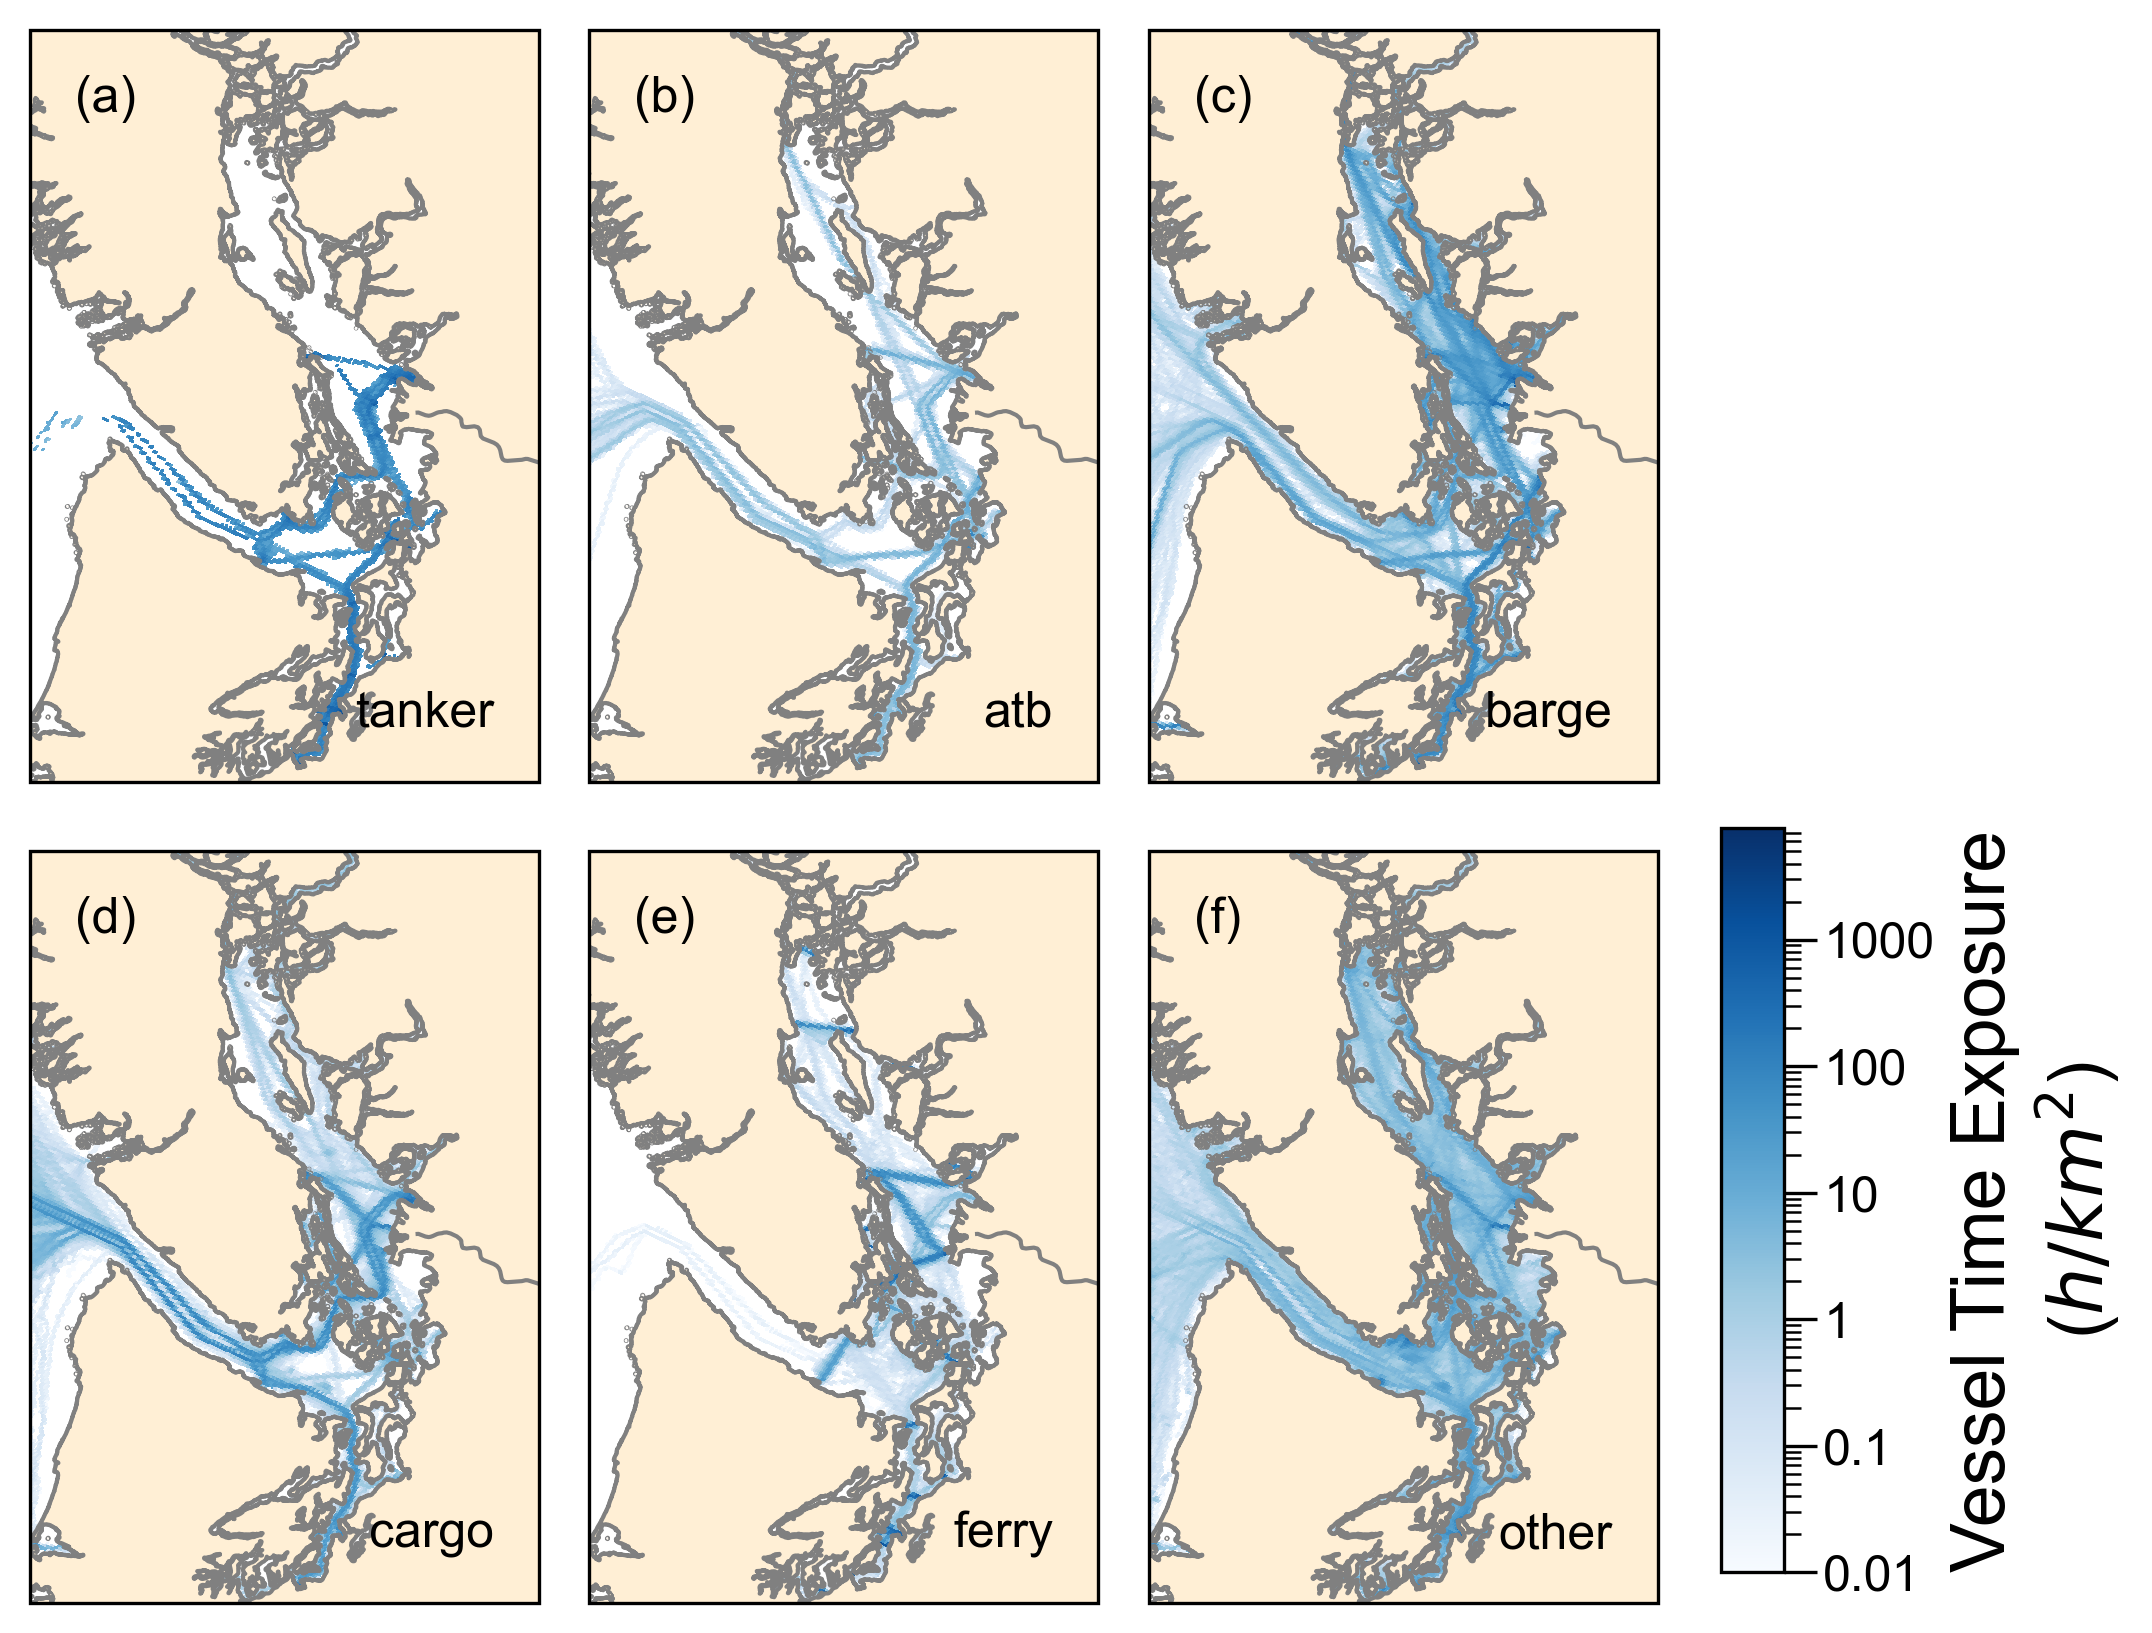

In [8]:
ec='grey'
lw=1
fs=12
ship_types = [
    'tanker', 
    'atb', 
    'barge', 
    'cargo',
    'ferry',  
    'other'
]

# add suplot labels
subplot_labels=['(a)','(b)','(c)','(d)','(e)','(f)']

fig, ax = plt.subplots(2, 3, 
              figsize=(7, 8), #(width, height)
              subplot_kw={'projection': rotated_crs, 
                "facecolor": "white"},
              gridspec_kw={
                   'width_ratios': [1,1,1],
                   'height_ratios': [1,1],
                   'wspace': 0.1,
                  'hspace':-.2}
)

for idx,ship in enumerate(ship_types):
    print(ship)
    if idx<3:
        ax[0,idx].set_extent(
            [-124, -123.75, lat.min()-0.15, lat.max()], 
            crs=plain_crs
        )
        # add subplot labels
        anchored_text_ul = AnchoredText(
            subplot_labels[idx], 
            loc="upper left",
            prop=dict(size=fs),frameon=False
        )
        # add text with ship type
        anchored_text_lr = AnchoredText(
            ship, loc="lower right",
            prop=dict(size=fs),frameon=False
        )
        ax[0,idx].add_artist(anchored_text_ul)
        ax[0,idx].add_artist(anchored_text_lr)
        #ax[0,idx].text(-45.99,0.682*lat.max(),ship)
        ax[0,idx].add_feature(feature.GSHHSFeature(
            'full', edgecolor=ec, linewidth=lw, facecolor='papayawhip'))
        ax[0,idx].add_feature(feature.NaturalEarthFeature(
            category='physical', name='rivers_lake_centerlines',
            scale='10m', facecolor='none', linewidth=lw, edgecolor=ec,
        ))
        C=ax[0,idx].pcolormesh(x, y, 
            vte[ship],
            cmap=mpl.cm.Blues, 
            norm=norm,
            transform=plain_crs)
         ## add lat/lon lines
         # gl = ax[0,idx].gridlines(
         #     linestyle="--", color='gray', alpha=0.5, 
         #     draw_labels=False, dms=True, x_inline=False, 
         #     y_inline=False
         # )
       
    else:
        ax[1,idx-3].set_extent(
            [-124, -123.75, lat.min()-0.15, lat.max()], 
            crs=plain_crs
        )
        # add subplot labels
        anchored_text_ul = AnchoredText(
            subplot_labels[idx], 
            loc="upper left",
            prop=dict(size=fs),frameon=False
        )
        # add text with ship type
        anchored_text_lr = AnchoredText(
            ship, loc="lower right",
            prop=dict(size=fs),frameon=False
        )
        ax[1,idx-3].add_artist(anchored_text_ul)
        ax[1,idx-3].add_artist(anchored_text_lr)
        ax[1,idx-3].add_feature(feature.GSHHSFeature(
            'full', edgecolor=ec, linewidth=lw, facecolor='papayawhip'))
        ax[1,idx-3].add_feature(feature.NaturalEarthFeature(
            category='physical', name='rivers_lake_centerlines',
            scale='10m', facecolor='none', linewidth=lw, edgecolor=ec,
        ))
        C=ax[1,idx-3].pcolormesh(x, y, 
            vte[ship],
            cmap=mpl.cm.Blues, 
            norm=norm,
            transform=plain_crs)
        # # add lat/lon lines
        # if (idx == 4):
        #     gl = ax[1,idx-3].gridlines(
        #          linestyle="--", color='gray', alpha=0.5, 
        #          draw_labels=True, dms=True, x_inline=False, 
        #          y_inline=False
        #     )
        #     gl.top_labels, gl.right_labels = False, False
        # else:
        #     gl = ax[1,idx-3].gridlines(
        #          linestyle="--", color='gray', alpha=0.5, 
        #          draw_labels=False, dms=True, x_inline=False, 
        #          y_inline=False
        #     )
       
cb_ax = fig.add_axes([.93,.18,.03,.31])
cb = fig.colorbar(C, 
    cax=cb_ax, 
    ticks=[1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    pad=0.1
    );

#cb.set_ticks([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])
cb.set_ticklabels(['0.01', '0.1', '1', '10', '100', '1000'])
minorticks = C.norm(numpy.arange(1, 10, 2))
cb.ax.xaxis.set_ticks(minorticks, minor=True)
cb.ax.tick_params(labelsize=12)
cb.ax.tick_params(which='major', length=8, color='k') 
cb.ax.tick_params(which='minor', length=4, color='k')
cb.ax.minorticks_on()
cb.set_label('Vessel Time Exposure\n($h/km^2$)');
if custom_dpi>=600:
    plt.savefig(graphics_dir/'Part1_Figure2_VTE_allTraffic.png')
else:
    plt.savefig(graphics_dir/'Part1_Figure2_VTE_allTraffic_small.png')
    
plt.show() 